<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 4: Proceso de Obtención de Datos</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 4.1: Exploración, Integración y Limpieza de Datos</center></font>
<font face = "Times New Roman" size = "4"><center>Subtema h: Concatenación, Agrupación y Pivoteo</center></font></b>
</div>

## CONCATENACIÓN, AGRUPACIÓN Y PIVOTEO DE DATAFRAMES

Dentro de las operaciones más empleadas en el manejo de **DataFrames** se encuentran la **Concatenación**, la **Agrupación** y el **Pivoteo** que se puede realizar entre ellos.

Para ejemplificar estas operaciones, se emplearán los datos contenidos en archivos en formato `TXT`, los cuales están separados por comas. En esos archivo se incluyen los nombres, sexo y la cantidad de bebés que nacieron para los años *2000* a *2018* (con ese nombre). Se asignarán los valores a un **DataFrame** donde los encabezados de las columnas de información son:

1. **Nombre**: Es el nombre asignado al bebé nacido en ese año.
2. **Sexo**: Es un valor booleano que indica el sexo del bebé (*F* y *M*).
3. **Cantidad**: Es la cantidad de bebés que nacieron con ese nombre.

Para la lectura de un archivo (*2018*) y la preparación de los datos, se realizarán las siguientes operaciones:

1. Importación de las librerías necesarias (**Pandas**, **NumPy** y **Matplotlib**).
2. Definición de los parámetros a emplear en los gráficos de **Matplotlib**.
3. Lectura de los datos empleando el método `.read_csv()`.
4. Mostrar el **DataFrame** resultante empleando el método `.head()`.

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (10, 8)}) 

#Lectura de los datos desde el archivo TXT
nomb18_df = pd.read_csv('./Datos/Nace/Nacimientos_2018.txt', names = ['Nombre', 'Sexo', 'Cantidad'])

#Impresión de los Resultados
print("El DataFrame es:")
nomb18_df.head(10)

El DataFrame es:


,Nombre,Sexo,Cantidad
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928
5,Charlotte,F,12940
6,Mia,F,12642
7,Amelia,F,12301
8,Harper,F,10582
9,Evelyn,F,10376


### Concatenación de los Datos
La **Concatenación** de objetos a través de **Pandas** permite unir los distintos archivos con los que se cuenta bajo la misma estructura definida para el **DataFrame**, para ello se emplea el método `.concat()`.

La documentación del método `.concat()` se puede consultar [en esta liga](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html).

Primeramente se inicializará una lista asignada a una variable, y por medio de un ciclo `for` se realiza la concatenación de cada uno de los archivos para el rango del año 2000 al 2018. Se agrega el valor `2018+1` para que este último año sea agregado también. 

Adicionalmente, se creará una columna nueva donde se agregue el año correspondiente. Para ello, se empleará el índice `-1` para que se agregue al final de la tabla.

In [3]:
#Creación de una Lista
todo_tiempo = []
for tiempo in range(2000, 2018+1):
    todo_tiempo.append(pd.read_csv('./Datos/Nace/Nacimientos_{}.txt'.format(tiempo), names = ['Nombre', 'Sexo', 'Cantidad']))
    todo_tiempo[-1]['Año'] = tiempo
    
#Concatenación de los Elementos de la Lista a un DataFrame
nombres_df = pd.concat(todo_tiempo)

#Impresión de los Resultados
print("El tamaño total del DataFrame es:",nombres_df.shape)
print("El DataFrame es:")
nombres_df

El tamaño total del DataFrame es: (624236, 4)
El DataFrame es:


,Nombre,Sexo,Cantidad,Año
0,Emily,F,25956,2000
1,Hannah,F,23082,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17702,2000
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


### Agrupación de los Datos
La **Agrupación** de datos a través de **Pandas** se realiza a través del método `.groupby()`, el cual genera un nuevo **DataFrame** con las características indicadas.

La documentación del método `.groupby()` se puede consultar [en esta liga](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Por ejemplo, para agrupar el **DataFrame** por medio de los valores de `Sexo` y `Año`:

In [5]:
#Agrupación de los datos por "Sexo" y "Año"
agrupa_df = nombres_df.groupby(['Sexo', 'Año'])
agrupa_df.head()

,Nombre,Sexo,Cantidad,Año
0,Emily,F,25956,2000
1,Hannah,F,23082,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17702,2000
...,...,...,...,...
18029,Liam,M,19837,2018
18030,Noah,M,18267,2018
18031,William,M,14516,2018
18032,James,M,13525,2018


A partir de este nuevo **DataFrame**, podemos revisar algunos detalles como el tamaño del agrupamiento. En este caso, **Pandas** nos indica la cantidad de nombres (registros) que hay para cada sexo y por cada año (no la cantidad de bebés que nacieron):

In [6]:
#Cantidad de Datos en el DataFrame
agrupa_df.size()

Sexo  Año 
F     2000    17655
      2001    17973
      2002    18082
      2003    18431
      2004    18828
      2005    19183
      2006    20053
      2007    20568
      2008    20464
      2009    20183
      2010    19815
      2011    19563
      2012    19509
      2013    19241
      2014    19191
      2015    19091
      2016    18836
      2017    18375
      2018    18029
M     2000    12117
      2001    12301
      2002    12482
      2003    12754
      2004    13220
      2005    13366
      2006    14035
      2007    14393
      2008    14615
      2009    14526
      2010    14258
      2011    14345
      2012    14238
      2013    14041
      2014    14052
      2015    14030
      2016    14174
      2017    14215
      2018    14004
dtype: int64

Es sencillo visualizar la cantidad de datos que fueron agrupados por los valores de `Sexo` y `Año`. 

Sin embargo, para que sea más sencilla la visualización, se puede emplear el método `.size().unstack()` de la siguiente manera:

In [7]:
#Cantidad de Datos en el DataFrame
agrupa_df.size().unstack()

Año,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Sexo,,,,,,,,,,,,,,,,,,,
F,17655,17973,18082,18431,18828,19183,20053,20568,20464,20183,19815,19563,19509,19241,19191,19091,18836,18375,18029
M,12117,12301,12482,12754,13220,13366,14035,14393,14615,14526,14258,14345,14238,14041,14052,14030,14174,14215,14004


Ahora, si se requiere saber el número total de bebés que nacieron, se puede usar el método `.sum()`. 

Por ejemplo, para el **DataFrame** que solo contiene los valores de 2018, se calcula el total de bebés nacidos en base al `Sexo`:

In [8]:
#Cantidad de Datos en el DataFrame
nomb18_df.groupby(['Sexo']).sum()

,Cantidad
Sexo,
F,1686961
M,1800392


Para el **DataFrame** agrupado por medio de los valores de `Sexo` y `Año`, es posible calcular la cantidad de bebés que nacieron agrupados por `Año`:

In [9]:
#Cantidad de Datos en el DataFrame
nombres_df.groupby(['Año']).sum()

,Cantidad
Año,
2000,3778497
2001,3741868
2002,3736498
2003,3800447
2004,3818813
2005,3842547
2006,3953577
2007,3994837
2008,3927263


De igual manera, es posible calcular la cantidad de bebés que nacieron agrupados por `Sexo`y `Año`:

In [12]:
#Cantidad de Datos en el DataFrame
nombres_df.groupby(['Año', 'Sexo']).sum()

Cantidad
Año  Sexo          
2000 F      1815295
     M      1963202
2001 F      1799834
     M      1942034
2002 F      1795973
     M      1940525
2003 F      1826173
     M      1974274
2004 F      1835091
     M      1983722
2005 F      1846525
     M      1996022
2006 F      1899824
     M      2053753
2007 F      1921053
     M      2073784
2008 F      1889069
     M      2038194
2009 F      1835062
     M      1981481
2010 F      1775345
     M      1916476
2011 F      1756592
     M      1896574
2012 F      1758171
     M      1893975
2013 F      1751320
     M      1888009
2014 F      1782350
     M      1916564
2015 F      1780453
     M      1911537
2016 F      1766212
     M      1891585
2017 F      1719138
     M      1842837
2018 F      1686961
     M      1800392

### Pivoteo
El **Pivoteo** o uso de ***Tablas Pivote*** son sumamente útiles para el caso de buscar conclusiones de los datos contenidos en el **DataFrame**. De manera automática pueden ordenar, contar, determinar totales o promedios de los datos. Posteriormente, los resultados se muestran a través de una nueva tabla.

En **Pandas**, la función de tabla pivote se realiza por medio del método `.pivot_table()`. 

La documentación del método `.pivot_table()` se puede consultar [en esta liga](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html).

Para realizar la construcción de una ***Tabla Pivote***, se empleará el **DataFrame** con el que hay interés en trabajar, indicando los datos con los que se pretende mostrar, y la manera como se agruparán. 

En este ejemplo se usará el **DataFrame** que contiene todos los datos del año 2000 al 2018 (`nombres_df`), comenzando con mostrar el número de bebés que han nacido pero agrupados por nombre y año:

In [13]:
#Cantidad de Datos en el DataFrame
pd.pivot_table(nombres_df, 'Cantidad', 'Nombre', 'Año')

Año,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Nombre,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0,9.0,11.0,7.0
Aabha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0,7.0,NaN,NaN
Aabid,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0
Aabidah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aabir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zyvon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
Zyyanna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Debido a que existen muchos valores nulos (`NaN`), lo cual es normal ya que indica que hay años en los que no hubo ningún bebé con dicho nombre, es probable que convenga utilizar `Nombre` y `Año` como columnas. Para ello, es posible emplear corchetes en el método `.pivot_table()` de la siguiente manera:

In [14]:
#Cantidad de Datos en el DataFrame
pd.pivot_table(nombres_df, 'Cantidad', ['Año', 'Nombre'])

Cantidad
Año  Nombre           
2000 Aadam         6.0
     Aadarsh       5.0
     Aadil         9.0
     Aaditya      11.0
     Aahil         6.0
...                ...
2018 Zyron         5.0
     Zyrus         8.0
     Zyus          6.0
     Zyva          6.0
     Zzyzx         5.0

[577624 rows x 1 columns]

Adicionalmente, es posible agrupar los datos para contener `Nombre` y `Sexo` en una dimensión, así como `Año` en la otra:

In [11]:
#Cantidad de Datos en el DataFrame
pd.pivot_table(nombres_df, 'Cantidad', ['Nombre', 'Sexo', 'Año'])

Cantidad
Nombre  Sexo Año           
Aaban   M    2007         5
             2009         6
             2010         9
             2011        11
             2012        11
...                     ...
Zyvon   M    2015         7
Zyyanna F    2010         6
Zyyon   M    2014         6
Zzyzx   M    2010         5
             2018         5

[624236 rows x 1 columns]

### Visualización de los Datos
Al emplear **Pandas** con otras librerías como **Matplotib**, es posible visualizar los datos de una manera mucho más adecuada. 

Por ejemplo, es posible visualizar los datos acerca de la popularidad de un cierto nombre para cada año. Para ello, es necesario definir y ordenar los **Indices** del **DataFrame** para que permita ver la manera como cambia la popularidad de ese nombre.

La librería **Pandas** permite realizar indexado multi-nivel para poder agrupar y manipular datos con un número de dimensiones arbitrario.

Primeramente, se definirán como los **Indices** del **DataFrame** que contiene todos los datos del año 2000 al 2018 (`nombres_df`) las columnas `Sexo`, `Nombre` y `Año`. Para ello se emplea el método `.set_index()` que ya ha sido revisado previamente, aplicando el método `.sort_index()` para que ordene el **DataFrame** en base a las columnas que definen los **Indices**, esto es: 

In [15]:
#Definición de los Indices en el DataFrame
nombres_df_index = nombres_df.set_index(['Sexo','Nombre','Año']).sort_index()

#Impresión de los Resultados
print("El DataFrame es:")
nombres_df_index

El DataFrame es:


Cantidad
Sexo Nombre Año           
F    Aabha  2011         7
            2012         5
            2014         9
            2015         7
            2016         7
...                    ...
M    Zyvion 2009         5
     Zyvon  2015         7
     Zyyon  2014         6
     Zzyzx  2010         5
            2018         5

[624236 rows x 1 columns]

Ahora se definirá una función llamada `nombres_grafica` a través de la cual se graficará la popularidad de un nombre respecto del tiempo. Para ello: 

1. Se hará el llamado a esa función por medio de los parámetros `Sexo` y `Nombre`.
2. Se empleará el método `.loc[]` para buscar renglones en el **DataFrame** en base a los parámetros `Sexo` y `Nombre` que se hayan indicado.
3. Finalmente se mostrarán esos valores de manera gráfica.

In [16]:
#Definición de la Función para Graficar Nombres
def nombres_grafica(sexo, nombre):
    datos = nombres_df_index.loc[sexo, nombre]
    plt.plot(datos.index, datos.values);
    plt.title('Popularidad de Nombre por Año');
    plt.xlabel('Años');
    plt.ylabel('Cantidad');

Para probarlo, se llamará a la función `nombres_grafica` con los parámetros `Sexo` y `Nombre` que definan valores en particular.

Por ejemplo, para el nombre ***Danica***:

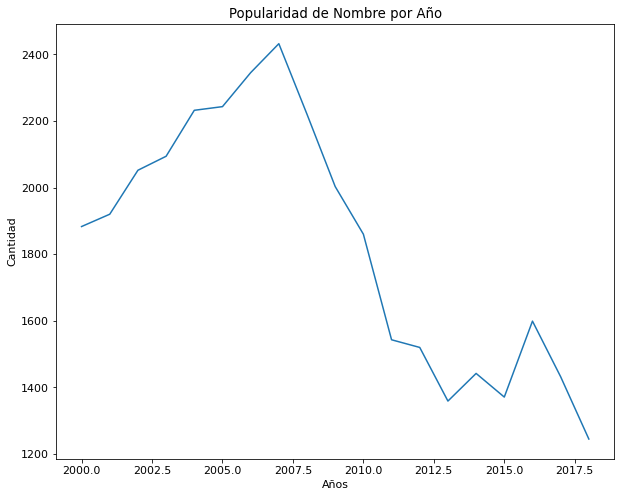

In [21]:
#Llamado a la Función nombres_grafica
nombres_grafica('M', 'Erick')

Donde es posible observar que el nombre "Danica" tuvo una amplia popularidad alrededor del año 2007, pero posteriormente fue decreciendo. 

Una ventaja es que la función `nombres_grafica` puede ser empleada para varios nombres a la vez. Para ello:

1. Se crea una lista con los nombres que interesa revisar.
2. Se realiza un ciclo `for` para enviar los nombres a la función `nombres_grafica`.
3. Finalmente, se incluye una leyenda para entender mejor los datos.

Esto es:

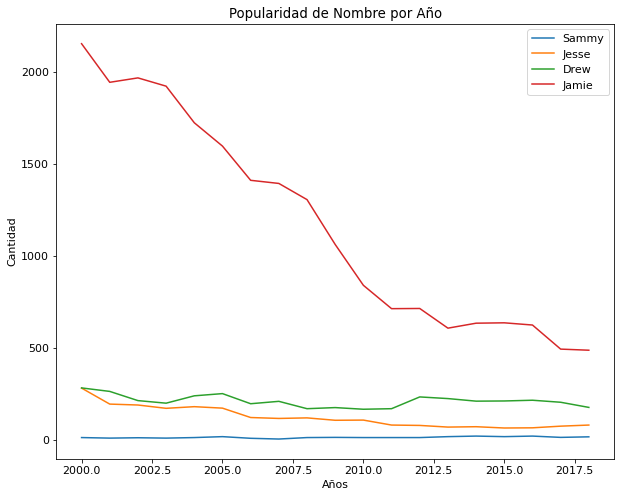

In [22]:
#Definición de la Lista de Nombres
nombres = ['Sammy', 'Jesse', 'Drew', 'Jamie']

#Llamado a la Función nombres_grafica
for nombre in nombres:
    nombres_grafica('F', nombre)

#Agregación de la Leyenda en el Gráfico
plt.legend(nombres);

¿Será distinto si los nombres son de hombre y no de mujer? Para ello, simplemente se modifica el parámetro en el llamado a la función `nombres_grafica` de la siguiente manera: 

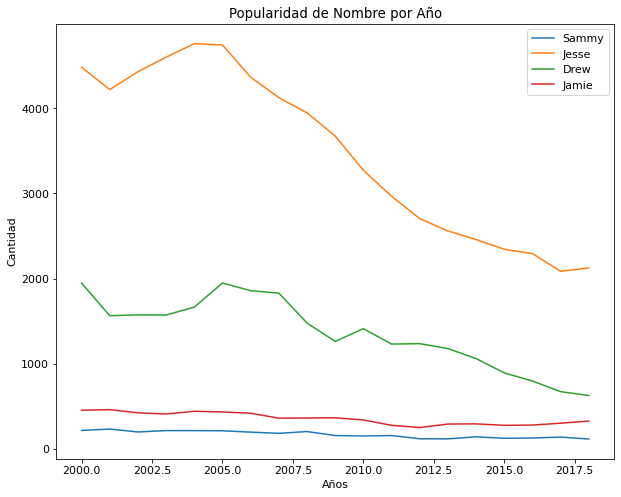

In [16]:
#Definición de la Lista de Nombres
nombres = ['Sammy', 'Jesse', 'Drew', 'Jamie']

#Llamado a la Función nombres_grafica
for nombre in nombres:
    nombres_grafica('M', nombre)

#Agregación de la Leyenda en el Gráfico
plt.legend(nombres);

A partir de este ejemplo de visualización se pueden construir distintos **DataFrames** que contengan **Indices** que sean múltiples, dependiendo de la naturaleza de los datos y de la información que se requiera extraer. 

<div class="alert alert-block alert-success">
<b>.: Fin del Subtema :.</b>
</div>

***Liga de aceso al siguiente Subtema:*** 
<br>[i. Uso de PandasGUI](i.%20Uso%20de%20PandasGUI.ipynb)